Tiempo de ejecución CPU: 2.7330 segundos


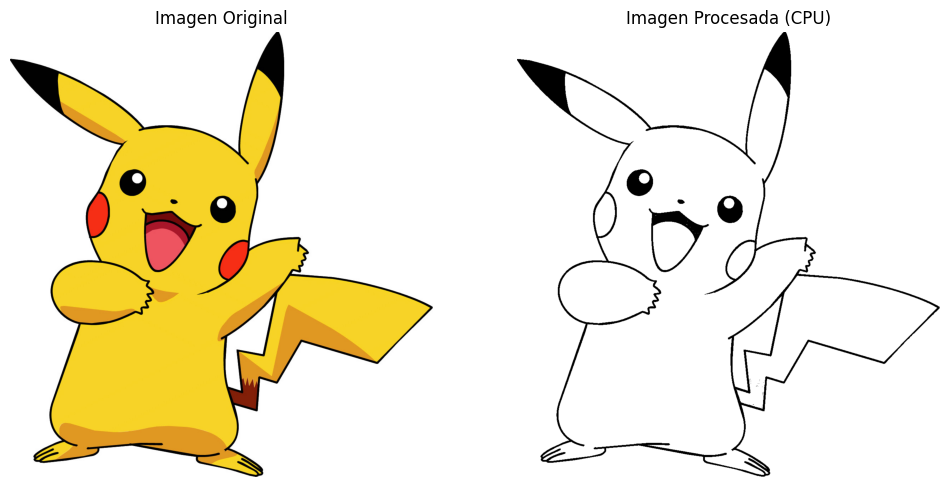

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# --- Cargar imagen ---
img = cv2.imread("pikachu.jpg")

# Convertimos de BGR (OpenCV) a RGB (matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Algoritmo CPU (igual al de GPU) ---
def edge_cpu(img, threshold=150):
    height, width, _ = img.shape
    output = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = img[i, j]
            s = int(r) + int(g) + int(b)

            if s > threshold:
                output[i, j] = 255
            else:
                output[i, j] = 0

    return output

# --- Medir tiempo ---
start = time.time()
processed = edge_cpu(img_rgb, 150)
end = time.time()

print(f"Tiempo de ejecución CPU: {end - start:.4f} segundos")

# --- Mostrar antes y después ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(processed, cmap="gray")
plt.title("Imagen Procesada (CPU)")
plt.axis("off")

plt.show()


Tiempo GPU (CuPy + CUDA): 0.3760 segundos


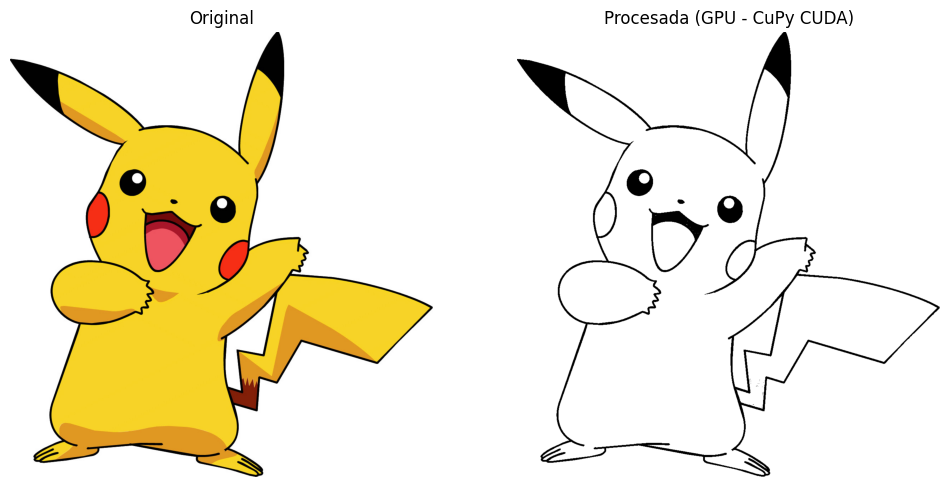

In [5]:
import cv2
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
import time

# --- Cargar imagen ---
img = cv2.imread("pikachu.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir imagen a GPU (como array CuPy)
img_gpu = cp.asarray(img_rgb)

# Crear output en GPU
height, width, _ = img_rgb.shape
out_gpu = cp.zeros((height, width), dtype=cp.uint8)

# --- Kernel CUDA en CuPy ---
kernel = cp.ElementwiseKernel(
    in_params='uint8 r, uint8 g, uint8 b, int32 threshold',
    out_params='uint8 out',
    operation='''
        int s = (int)r + (int)g + (int)b;
        out = (s > threshold) ? 255 : 0;
    ''',
    name='edge_gpu'
)

# --- Ejecutar y medir tiempo ---
start = time.time()
kernel(img_gpu[:,:,0], img_gpu[:,:,1], img_gpu[:,:,2], 150, out_gpu)
cp.cuda.Stream.null.synchronize()
end = time.time()

print(f"Tiempo GPU (CuPy + CUDA): {end - start:.4f} segundos")

# Pasar resultado a CPU
output = cp.asnumpy(out_gpu)

# --- Mostrar resultado ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output, cmap="gray")
plt.title("Procesada (GPU - CuPy CUDA)")
plt.axis("off")

plt.show()
